In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

%matplotlib inline

In [56]:
df = pd.read_csv('austin.csv')
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (12,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,...,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH
0,2018,1,86,Parks & Recreation,1000,General Fund,7CRS,Community Services,2ATH,Athletics,...,1,0,1,NaN,NaN,NaN,Mileage reimbursements,33.71,2017,10
1,2018,1,86,Parks & Recreation,1000,General Fund,7CRS,Community Services,7RCA,Community Recreation Services,...,1,0,2,NaN,NaN,NaN,Mileage reimbursements,24.08,2017,10
2,2018,1,34,Enterprise Debt Service,9722,Convention Center HOT Debt Service Fund-Subord...,9TRQ,Transfers and Other Requirements,9REQ,Other Requirements,...,1,0,1,NaN,NaN,NaN,Services-other,203.00,2017,10
3,2018,1,87,Police,1000,General Fund,11AA,Neighborhood-Based Policing,11A1,Patrol,...,1,0,2,NaN,NaN,NaN,Educational travel,34.85,2017,10
4,2018,1,34,Enterprise Debt Service,9722,Convention Center HOT Debt Service Fund-Subord...,9TRQ,Transfers and Other Requirements,9REQ,Other Requirements,...,1,0,1,NaN,NaN,NaN,Services-other,70000.00,2017,10


In [57]:
df.shape

(116988, 34)

<Container object of 9 artists>

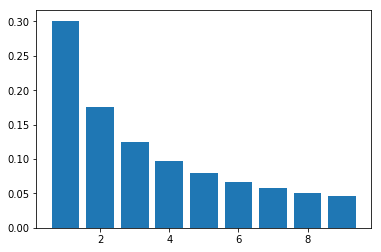

In [58]:
digits = list(range(1,10))

benford = [np.log10((1+1/i)) for i in digits]
plt.bar(digits, benford)

#def benford(x):
#    pct = math.log(((x+1)/x)[10])
#    return pct

In [59]:
df = df.loc[df['AMOUNT'] > 1, :].copy()

In [60]:
df['FIRST_DIGIT'] = df['AMOUNT'].apply(lambda amount: int(str(amount)[0]))
df[['AMOUNT', 'FIRST_DIGIT']].head()

,AMOUNT,FIRST_DIGIT
0,33.71,3
1,24.08,2
2,203.00,2
3,34.85,3
4,70000.00,7


In [61]:
df = pd.get_dummies(df, columns=['FIRST_DIGIT'])

In [63]:
first_digit_columns = ['FIRST_DIGIT_{}'.format(i) for i in range(1,10)]
first_digit_columns

['FIRST_DIGIT_1',
 'FIRST_DIGIT_2',
 'FIRST_DIGIT_3',
 'FIRST_DIGIT_4',
 'FIRST_DIGIT_5',
 'FIRST_DIGIT_6',
 'FIRST_DIGIT_7',
 'FIRST_DIGIT_8',
 'FIRST_DIGIT_9']

In [64]:
citywide_first_digit_percentages = df[first_digit_columns].mean().values
citywide_first_digit_percentages

array([0.29591496, 0.16989155, 0.12847529, 0.09742381, 0.08585023,
       0.06371469, 0.06344893, 0.05094089, 0.04433966])

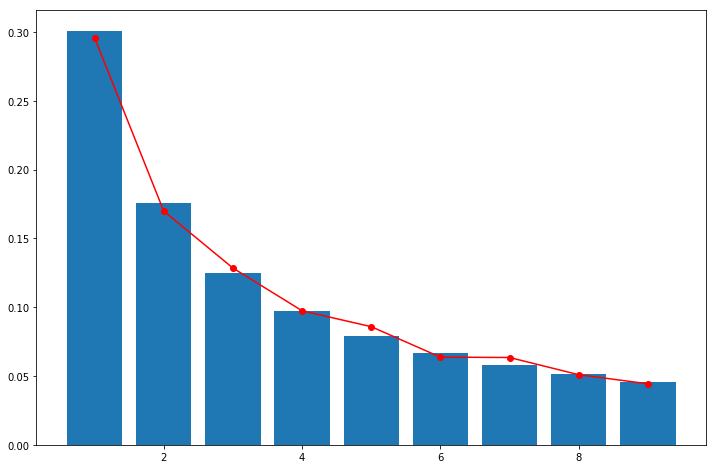

In [65]:
plt.figure(figsize=(12, 8))
plt.bar(digits, benford)
plt.plot(digits, citywide_first_digit_percentages, color='r', marker='o')

In [66]:
df.head()

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,...,CAL_MONTH,FIRST_DIGIT_1,FIRST_DIGIT_2,FIRST_DIGIT_3,FIRST_DIGIT_4,FIRST_DIGIT_5,FIRST_DIGIT_6,FIRST_DIGIT_7,FIRST_DIGIT_8,FIRST_DIGIT_9
0,2018,1,86,Parks & Recreation,1000,General Fund,7CRS,Community Services,2ATH,Athletics,...,10,0,0,1,0,0,0,0,0,0
1,2018,1,86,Parks & Recreation,1000,General Fund,7CRS,Community Services,7RCA,Community Recreation Services,...,10,0,1,0,0,0,0,0,0,0
2,2018,1,34,Enterprise Debt Service,9722,Convention Center HOT Debt Service Fund-Subord...,9TRQ,Transfers and Other Requirements,9REQ,Other Requirements,...,10,0,1,0,0,0,0,0,0,0
3,2018,1,87,Police,1000,General Fund,11AA,Neighborhood-Based Policing,11A1,Patrol,...,10,0,0,1,0,0,0,0,0,0
4,2018,1,34,Enterprise Debt Service,9722,Convention Center HOT Debt Service Fund-Subord...,9TRQ,Transfers and Other Requirements,9REQ,Other Requirements,...,10,0,0,0,0,0,0,1,0,0


In [69]:
departments = df['DEPT_NM'].value_counts().index[:26]
departments

Index(['Austin Energy', 'Austin Water', 'Parks & Recreation', 'Fleet Services',
       'Public Works - Transportation', 'Police', 'Austin Public Health',
       'Watershed Protection', 'Aviation',
       'Communications & Technology Management', 'Austin Resource Recovery',
       'Austin Public Library', 'Building Services',
       'Emergency Medical Services', 'Economic Development',
       'Austin Transportation', 'Austin Convention Center',
       'Financial Services', 'Fire', 'Public Works', 'Austin Code',
       'Human Resources', 'Neighborhood Housing & Community Development',
       'Wireless', 'Development Services', 'Law'],
      dtype='object')

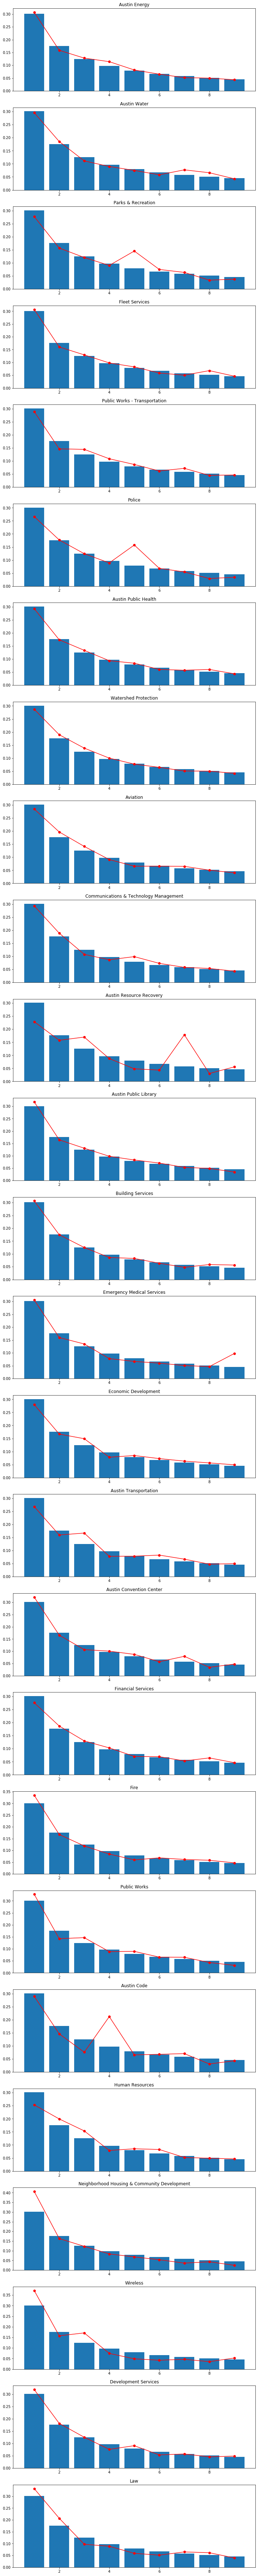

In [74]:
#create the chart
fig, axes = plt.subplots(ncols=1, nrows=len(departments), figsize=(12, len(departments) * 5))
for i, dept in enumerate(departments):
    department_percentages = df.loc[df['DEPT_NM'] == dept, first_digit_columns].mean().values
    axes[i].plot(digits, department_percentages, color='r', marker='o')
    axes[i].bar(digits, benford)
    axes[i].set_title(dept)

In [75]:
#Denver-what is the deal with the 5 in Parks and Rec?

#What is the particular amount? how many were written? total figure? What were they paying for?

df_parks = df.loc[(df['DEPT_NM']=='Parks & Recreation')]

In [80]:
df_parks['AMOUNT'].value_counts().head()
#I think the particular amounts were 588 and 500
#222 were written and the total figure is: 130536
#print(588 * 222)

130536


In [93]:
pd.set_option('display.max_columns', 999)
df_parks_588 = df_parks.loc[df_parks['AMOUNT']==588]
df_parks_588

,FY_DC,PER_CD,DEPT_CD,DEPT_NM,FUND_CD,FUND_NM,DIV_CD,DIV_NM,GP_CD,GP_NM,OCAT_CD,OCAT_NM,OBJ_CD,OBJ_NM,LGL_NM,VEND_CUST_CD,VEND_CUST_IND,RFED_DOC_CD,RFED_DOC_DEPT_CD,RFED_DOC_ID,COMM_CD,COMM_DSCR,CHK_EFT_ISS_DT,CVL_CHK_STA_DV,RFED_VEND_LN_NO,RFED_COMM_LN_NO,RFED_ACTG_LN_NO,RF_DOC_CD,RF_DOC_DEPT_CD,RF_DOC_ID,ACTG_LN_DSCR,AMOUNT,CAL_YEAR,CAL_MONTH,FIRST_DIGIT_1,FIRST_DIGIT_2,FIRST_DIGIT_3,FIRST_DIGIT_4,FIRST_DIGIT_5,FIRST_DIGIT_6,FIRST_DIGIT_7,FIRST_DIGIT_8,FIRST_DIGIT_9
18540,2018,1,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17100500433,75035,Crushed Stone (Includes Riprap),10/08/0017,Paid,1,18,1,DO,8600.0,17072714089,Crushed Stone (Includes Riprap),588.0,2017,10,0,0,0,0,1,0,0,0,0
18670,2018,1,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17100500433,75035,Crushed Stone (Includes Riprap),10/08/0017,Paid,1,15,1,DO,8600.0,17072714089,Crushed Stone (Includes Riprap),588.0,2017,10,0,0,0,0,1,0,0,0,0
19406,2018,1,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17092935612,75035,Crushed Stone (Includes Riprap),10/04/0017,Paid,1,5,1,DO,8600.0,16092120263,Crushed Stone (Includes Riprap),588.0,2017,10,0,0,0,0,1,0,0,0,0
20046,2017,12,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17092635081,75035,Crushed Stone (Includes Riprap),09/29/0017,Paid,1,31,1,DO,8600.0,16092120263,Crushed Stone (Includes Riprap),588.0,2017,9,0,0,0,0,1,0,0,0,0
20076,2018,1,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17092935612,75035,Crushed Stone (Includes Riprap),10/04/0017,Paid,1,3,1,DO,8600.0,16092120263,Crushed Stone (Includes Riprap),588.0,2017,10,0,0,0,0,1,0,0,0,0
20312,2018,1,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17100500433,75035,Crushed Stone (Includes Riprap),10/08/0017,Paid,1,34,1,DO,8600.0,17072714089,Crushed Stone (Includes Riprap),588.0,2017,10,0,0,0,0,1,0,0,0,0
20423,2018,1,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17100500433,75035,Crushed Stone (Includes Riprap),10/08/0017,Paid,1,27,1,DO,8600.0,17072714089,Crushed Stone (Includes Riprap),588.0,2017,10,0,0,0,0,1,0,0,0,0
20482,2017,12,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17092635081,75035,Crushed Stone (Includes Riprap),09/29/0017,Paid,1,32,1,DO,8600.0,16092120263,Crushed Stone (Includes Riprap),588.0,2017,9,0,0,0,0,1,0,0,0,0
20530,2018,1,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17100200034,75035,Crushed Stone (Includes Riprap),10/05/0017,Paid,1,19,1,DO,8600.0,17072714089,Crushed Stone (Includes Riprap),588.0,2017,10,0,0,0,0,1,0,0,0,0
20716,2018,1,86,Parks & Recreation,1000,General Fund,10PL,"Parks, Planning, Development & Operations",5PMA,Grounds Maintenance,154,Commodities,7119,Sand/gravel/stone,KLEPZIG INC,V00000905755,V,PRM,8600,17100500433,75035,Crushed Stone (Includes Riprap),10/08/0017,Paid,1,12,1,DO,86